In [1]:
!pip install bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
source = requests.get('https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Bandung').text
soup=BeautifulSoup(source, 'html5lib')

In [3]:
tables = soup.find_all('table')

In [4]:
df = pd.read_html(str(tables[0]), flavor='bs4')[0]

df

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,32.73.05,Andir,6,Campaka Ciroyom Dunguscariang Garuda Kebonjeru...
1,32.73.10,Astana Anyar,6,Cibadak Karanganyar Karasak Nyengseret Panjuna...
2,32.73.20,Antapani,4,Antapani Kidul Antapani Kulon Antapani Tengah ...
3,32.73.24,Arcamanik,4,Cisaranten Bina Harapan Cisaranten Endah Cisar...
4,32.73.03,Babakan Ciparay,6,Babakan Babakanciparay Cirangrang Margahayu Ut...
5,32.73.21,Bandung Kidul,4,Batununggal Kujangsari Mengger Wates
6,32.73.15,Bandung Kulon,8,Caringin Cibuntu Cigondewah Kaler Cigondewah K...
7,32.73.09,Bandung Wetan,3,Cihapit Citarum Tamansari
8,32.73.12,Batununggal,8,Binong Cibangkong Gumuruh Kacapiring Kebongeda...
9,32.73.04,Bojongloa Kaler,5,Babakan Asih Babakan Tarogong Jamika Kopo Suka...


code obtained from 'hints' <br>
df has been cleaned <br>
cells with a borough that is Not assigned has been ignored <br>
some borough name has been shortened as above.

In [5]:
df.shape

(31, 4)

In [6]:
df.head()

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan
0,32.73.05,Andir,6,Campaka Ciroyom Dunguscariang Garuda Kebonjeru...
1,32.73.10,Astana Anyar,6,Cibadak Karanganyar Karasak Nyengseret Panjuna...
2,32.73.20,Antapani,4,Antapani Kidul Antapani Kulon Antapani Tengah ...
3,32.73.24,Arcamanik,4,Cisaranten Bina Harapan Cisaranten Endah Cisar...
4,32.73.03,Babakan Ciparay,6,Babakan Babakanciparay Cirangrang Margahayu Ut...


In [7]:
!pip install geocoder

In [8]:
lat_lon = pd.read_csv('http://data.bandung.go.id/dataset/1fb076f0-24f8-4abe-b418-3b62083e15e8/resource/a6a429b4-18ff-4973-8310-c99ed4db6e08/download/koordinat-dan-ketinggian-kantor-kecamatan-di-kota-bandung-2014.csv')
lat_lon.head()

,Kecamatan,Lintang Selatan,Bujur Timur,Ketinggian (dpl)
0,Bandung Kulon,6.92520,107.5745,709
1,Babakan Ciparay,6.93710,107.5830,697
2,Bojongloa Kaler,6.93880,107.5938,694
3,Bojongloa Kidul,6.94285,107.5967,689
4,Astanaanyar,6.93190,107.5998,695


In [9]:
#lat_lon.rename(columns={'Postal Code':'PostalCode'},inplace=True)
df2 = pd.merge(df,lat_lon,on='Kecamatan')
df2.head()

,Kode Kemendagri,Kecamatan,Jumlah Kelurahan,Daftar Kelurahan,Lintang Selatan,Bujur Timur,Ketinggian (dpl)
0,32.73.05,Andir,6,Campaka Ciroyom Dunguscariang Garuda Kebonjeru...,6.90820,107.5740,733
1,32.73.20,Antapani,4,Antapani Kidul Antapani Kulon Antapani Tengah ...,6.90395,107.6646,690
2,32.73.24,Arcamanik,4,Cisaranten Bina Harapan Cisaranten Endah Cisar...,6.91800,107.6850,680
3,32.73.03,Babakan Ciparay,6,Babakan Babakanciparay Cirangrang Margahayu Ut...,6.93710,107.5830,697
4,32.73.21,Bandung Kidul,4,Batununggal Kujangsari Mengger Wates,6.95900,107.6365,670


In [10]:
df3 = df2.drop(['Kode Kemendagri', 'Jumlah Kelurahan', 'Daftar Kelurahan', 'Ketinggian (dpl)'], axis=1)
df3.columns = ['Neighborhood', 'Latitude', 'Longitude']
df3['Latitude'] = -1 * df3['Latitude']

In [11]:
df3

,Neighborhood,Latitude,Longitude
0,Andir,-6.90820,107.5740
1,Antapani,-6.90395,107.6646
2,Arcamanik,-6.91800,107.6850
3,Babakan Ciparay,-6.93710,107.5830
4,Bandung Kidul,-6.95900,107.6365
5,Bandung Kulon,-6.92520,107.5745
6,Bandung Wetan,-6.89728,107.6096
7,Batununggal,-6.93850,107.6371
8,Bojongloa Kaler,-6.93880,107.5938
9,Bojongloa Kidul,-6.94285,107.5967


In [12]:
bandung_data = df3.drop(df3.index[[16,19,21,23]])

In [13]:
bandung_data

,Neighborhood,Latitude,Longitude
0,Andir,-6.90820,107.5740
1,Antapani,-6.90395,107.6646
2,Arcamanik,-6.91800,107.6850
3,Babakan Ciparay,-6.93710,107.5830
4,Bandung Kidul,-6.95900,107.6365
5,Bandung Kulon,-6.92520,107.5745
6,Bandung Wetan,-6.89728,107.6096
7,Batununggal,-6.93850,107.6371
8,Bojongloa Kaler,-6.93880,107.5938
9,Bojongloa Kidul,-6.94285,107.5967


In [14]:
address = 'Bandung, West Java'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bandung are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bandung are -6.9344694, 107.6049539.


In [15]:
# create map of Bandung using latitude and longitude values
map_bandung = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df3['Latitude'], df3['Longitude'], df3['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bandung)  
    
map_bandung

Foursquare ID

In [16]:
CLIENT_ID = 'KI4LV0LJBWF4EPJVNOMEDY3WUQ212UPJJQCHZH3PEO1IGOH5' # your Foursquare ID
CLIENT_SECRET = 'OE0LAPVR0FEUXMB4ZX4HJLTFDCIP0WLZ21HB50HPIAS5QMHL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KI4LV0LJBWF4EPJVNOMEDY3WUQ212UPJJQCHZH3PEO1IGOH5
CLIENT_SECRET:OE0LAPVR0FEUXMB4ZX4HJLTFDCIP0WLZ21HB50HPIAS5QMHL


In [17]:
bandung_data.loc[6, 'Neighborhood']

'Bandung Wetan'

In [18]:
neighborhood_latitude = bandung_data.loc[6, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bandung_data.loc[6, 'Longitude'] # neighborhood longitude value

neighborhood_name = bandung_data.loc[6, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bandung Wetan are -6.89728, 107.6096.


In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KI4LV0LJBWF4EPJVNOMEDY3WUQ212UPJJQCHZH3PEO1IGOH5&client_secret=OE0LAPVR0FEUXMB4ZX4HJLTFDCIP0WLZ21HB50HPIAS5QMHL&v=20180605&ll=-6.89728,107.6096&radius=1000&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6065971598f8635a26f74b6e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bandung',
  'headerFullLocation': 'Bandung',
  'headerLocationGranularity': 'city',
  'totalResults': 67,
  'suggestedBounds': {'ne': {'lat': -6.888279990999991,
    'lng': 107.61864868992365},
   'sw': {'lat': -6.906280009000009, 'lng': 107.60055131007636}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '534a439c498e8ddc9f614b37',
       'name': 'Chatime',
       'location': {'address': 'Balubur Town Square (Baltos)',
        'crossStreet': 'Ace Home',
        'lat': -6.898391252070754,
        'lng': 107.60929432396583,
        'labeledLatLngs': [{'label': 'display',


In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Chatime,Bubble Tea Shop,-6.898391,107.609294
1,"HALFWAY ""Small Humble Home""",Bar,-6.899605,107.609848
2,Warung Kopi Imah Babaturan,Coffee Shop,-6.898026,107.607749
3,Moxy by Marriott Hotels Bandung,Hotel,-6.900282,107.612277
4,Kartika Sari,Bakery,-6.897453,107.612416


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

67 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Bandung

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
bandung_venues = getNearbyVenues(names=bandung_data['Neighborhood'],
                                   latitudes=bandung_data['Latitude'],
                                   longitudes=bandung_data['Longitude']
                                  )

Andir
Antapani
Arcamanik
Babakan Ciparay
Bandung Kidul
Bandung Kulon
Bandung Wetan
Batununggal
Bojongloa Kaler
Bojongloa Kidul
Buahbatu
Cibeunying Kaler
Cibeunying Kidul
Cibiru
Cicendo
Cidadap
Coblong
Gedebage
Lengkong
Panyileukan
Regol
Sukajadi
Sukasari
Sumur Bandung


In [26]:
print(bandung_venues.shape)
bandung_venues.head()

(371, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andir,-6.90820,107.5740,Nasi Bistik Astana Anyar,-6.910674,107.575847,Food Truck
1,Andir,-6.90820,107.5740,Indomaret,-6.909109,107.578425,Convenience Store
2,Andir,-6.90820,107.5740,Rumah Miring Bandung,-6.911119,107.574870,Restaurant
3,Antapani,-6.90395,107.6646,Ayam Penyet Joko Solo,-6.904091,107.667294,Indonesian Restaurant
4,Antapani,-6.90395,107.6646,Cartil (caringin tilu) puncak Bandung,-6.904102,107.665236,Scenic Lookout


In [27]:
bandung_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Andir,3,3,3,3,3,3
Antapani,3,3,3,3,3,3
Arcamanik,3,3,3,3,3,3
Babakan Ciparay,4,4,4,4,4,4
Bandung Kidul,5,5,5,5,5,5
Bandung Kulon,7,7,7,7,7,7
Bandung Wetan,61,61,61,61,61,61
Batununggal,4,4,4,4,4,4
Bojongloa Kaler,5,5,5,5,5,5


In [28]:
print('There are {} uniques categories.'.format(len(bandung_venues['Venue Category'].unique())))

There are 105 uniques categories.


In [29]:
## 3. Analyze Each Neighborhood

In [30]:
# one hot encoding
bandung_onehot = pd.get_dummies(bandung_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bandung_onehot['Neighborhood'] = bandung_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bandung_onehot.columns[-1]] + list(bandung_onehot.columns[:-1])
bandung_onehot = bandung_onehot[fixed_columns]

bandung_onehot.head()

,Neighborhood,Acehnese Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Cafeteria,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,Flower Shop,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Grocery Store,Gym / Fitness Center,Hardware Store,High School,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Japanese Restaurant,Javanese Restaurant,Karaoke Bar,Korean Restaurant,Lounge,Market,Medical Center,Motorcycle Shop,Multiplex,Music Venue,Nightclub,Noodle House,Optical Shop,Padangnese Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Pool,Pool Hall,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Ski Area,Snack Place,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Sundanese Restaurant,Supermarket,Tailor Shop,Tea Room,Thai Restaurant,Toy / Game Store,Track Stadium,Vegetarian / Vegan Restaurant,Yoga Studio
0,Andir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Andir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Antapani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Antapani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
bandung_onehot.shape

(371, 106)

In [32]:
bandung_grouped = bandung_onehot.groupby('Neighborhood').mean().reset_index()
bandung_grouped

,Neighborhood,Acehnese Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Cafeteria,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,Flower Shop,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Grocery Store,Gym / Fitness Center,Hardware Store,High School,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Japanese Restaurant,Javanese Restaurant,Karaoke Bar,Korean Restaurant,Lounge,Market,Medical Center,Motorcycle Shop,Multiplex,Music Venue,Nightclub,Noodle House,Optical Shop,Padangnese Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Pool,Pool Hall,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Ski Area,Snack Place,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Sundanese Restaurant,Supermarket,Tailor Shop,Tea Room,Thai Restaurant,Toy / Game Store,Track Stadium,Vegetarian / Vegan Restaurant,Yoga Studio
0,Andir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Antapani,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Arcamanik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [33]:
bandung_grouped.shape

(24, 106)

In [34]:
num_top_venues = 5

for hood in bandung_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bandung_grouped[bandung_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Andir----
               venue  freq
0         Restaurant  0.33
1  Convenience Store  0.33
2         Food Truck  0.33
3        Music Venue  0.00
4               Pool  0.00


----Antapani----
                   venue  freq
0             Restaurant  0.33
1  Indonesian Restaurant  0.33
2         Scenic Lookout  0.33
3            Music Venue  0.00
4                   Pool  0.00


----Arcamanik----
               venue  freq
0         Food Court  0.33
1  Convenience Store  0.33
2   Department Store  0.33
3        Music Venue  0.00
4               Pool  0.00


----Babakan Ciparay----
                 venue  freq
0                 Café  0.50
1          High School  0.25
2          Bus Station  0.25
3  Acehnese Restaurant  0.00
4            Nightclub  0.00


----Bandung Kidul----
                 venue  freq
0           Soup Place   0.2
1         Cupcake Shop   0.2
2  Javanese Restaurant   0.2
3   Chinese Restaurant   0.2
4                 Café   0.2


----Bandung Kulon----
               

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bandung_grouped['Neighborhood']

for ind in np.arange(bandung_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bandung_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andir,Restaurant,Convenience Store,Food Truck,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
1,Antapani,Restaurant,Indonesian Restaurant,Scenic Lookout,Yoga Studio,Diner,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store
2,Arcamanik,Convenience Store,Department Store,Food Court,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
3,Babakan Ciparay,Café,High School,Bus Station,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop
4,Bandung Kidul,Soup Place,Chinese Restaurant,Café,Javanese Restaurant,Cupcake Shop,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store


In [37]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andir,Restaurant,Convenience Store,Food Truck,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
1,Antapani,Restaurant,Indonesian Restaurant,Scenic Lookout,Yoga Studio,Diner,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store
2,Arcamanik,Convenience Store,Department Store,Food Court,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
3,Babakan Ciparay,Café,High School,Bus Station,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop
4,Bandung Kidul,Soup Place,Chinese Restaurant,Café,Javanese Restaurant,Cupcake Shop,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store
5,Bandung Kulon,Indonesian Meatball Place,Pool,Gym / Fitness Center,Restaurant,Sundanese Restaurant,Ski Area,Yoga Studio,Dessert Shop,College Auditorium,College Cafeteria
6,Bandung Wetan,Café,Food Court,Indonesian Restaurant,Convenience Store,Japanese Restaurant,Hotel,Seafood Restaurant,Lounge,Bakery,Coffee Shop
7,Batununggal,Spa,Boutique,Convenience Store,Noodle House,College Cafeteria,College Gym,College Stadium,Cosmetics Shop,Cupcake Shop,Department Store
8,Bojongloa Kaler,Hotel,Indonesian Restaurant,Food,Snack Place,Yoga Studio,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store
9,Bojongloa Kidul,Donut Shop,Pizza Place,Indonesian Restaurant,Yoga Studio,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop


## 4. Cluster Neighborhoods

In [39]:

import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

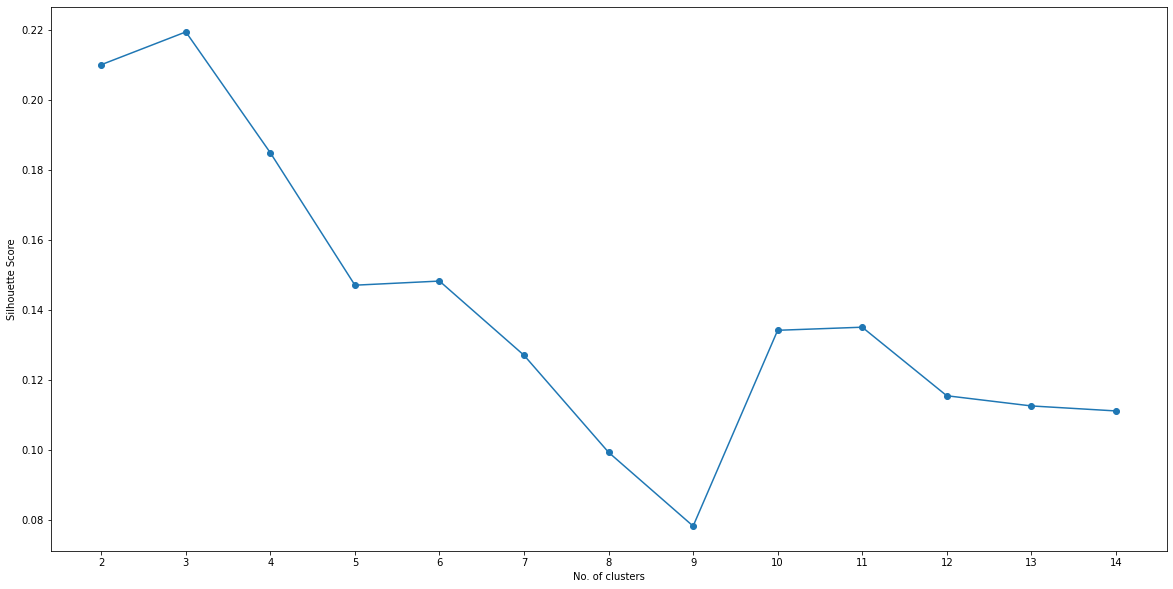

In [40]:
max_range = 15

bandung_grouped_clustering = bandung_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = bandung_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [41]:
# set number of clusters
#kclusters = 8

#bandung_grouped_clustering = bandung_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(bandung_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bandung_merged = bandung_data

# merge bandung_grouped with bandung_data to add latitude/longitude for each neighborhood
bandung_merged = bandung_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bandung_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andir,-6.90820,107.5740,1,Restaurant,Convenience Store,Food Truck,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
1,Antapani,-6.90395,107.6646,1,Restaurant,Indonesian Restaurant,Scenic Lookout,Yoga Studio,Diner,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store
2,Arcamanik,-6.91800,107.6850,1,Convenience Store,Department Store,Food Court,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
3,Babakan Ciparay,-6.93710,107.5830,1,Café,High School,Bus Station,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop
4,Bandung Kidul,-6.95900,107.6365,1,Soup Place,Chinese Restaurant,Café,Javanese Restaurant,Cupcake Shop,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store


In [43]:
bandung_merged


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andir,-6.90820,107.5740,1,Restaurant,Convenience Store,Food Truck,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
1,Antapani,-6.90395,107.6646,1,Restaurant,Indonesian Restaurant,Scenic Lookout,Yoga Studio,Diner,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store
2,Arcamanik,-6.91800,107.6850,1,Convenience Store,Department Store,Food Court,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
3,Babakan Ciparay,-6.93710,107.5830,1,Café,High School,Bus Station,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop
4,Bandung Kidul,-6.95900,107.6365,1,Soup Place,Chinese Restaurant,Café,Javanese Restaurant,Cupcake Shop,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store
5,Bandung Kulon,-6.92520,107.5745,1,Indonesian Meatball Place,Pool,Gym / Fitness Center,Restaurant,Sundanese Restaurant,Ski Area,Yoga Studio,Dessert Shop,College Auditorium,College Cafeteria
6,Bandung Wetan,-6.89728,107.6096,1,Café,Food Court,Indonesian Restaurant,Convenience Store,Japanese Restaurant,Hotel,Seafood Restaurant,Lounge,Bakery,Coffee Shop
7,Batununggal,-6.93850,107.6371,1,Spa,Boutique,Convenience Store,Noodle House,College Cafeteria,College Gym,College Stadium,Cosmetics Shop,Cupcake Shop,Department Store
8,Bojongloa Kaler,-6.93880,107.5938,1,Hotel,Indonesian Restaurant,Food,Snack Place,Yoga Studio,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store
9,Bojongloa Kidul,-6.94285,107.5967,0,Donut Shop,Pizza Place,Indonesian Restaurant,Yoga Studio,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop


In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bandung_merged['Latitude'], bandung_merged['Longitude'], bandung_merged['Neighborhood'], bandung_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

In [47]:
bandung_merged.loc[bandung_merged['Cluster Labels'] == 0, bandung_merged.columns[[0] + list(range(4, bandung_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Bojongloa Kidul,Donut Shop,Pizza Place,Indonesian Restaurant,Yoga Studio,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop
10,Buahbatu,Donut Shop,Restaurant,Sports Club,Yoga Studio,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop


In [48]:
bandung_merged.loc[bandung_merged['Cluster Labels'] == 1, bandung_merged.columns[[0] + list(range(4, bandung_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andir,Restaurant,Convenience Store,Food Truck,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
1,Antapani,Restaurant,Indonesian Restaurant,Scenic Lookout,Yoga Studio,Diner,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store
2,Arcamanik,Convenience Store,Department Store,Food Court,Yoga Studio,Donut Shop,College Auditorium,College Cafeteria,College Gym,College Stadium,Cosmetics Shop
3,Babakan Ciparay,Café,High School,Bus Station,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop
4,Bandung Kidul,Soup Place,Chinese Restaurant,Café,Javanese Restaurant,Cupcake Shop,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store
5,Bandung Kulon,Indonesian Meatball Place,Pool,Gym / Fitness Center,Restaurant,Sundanese Restaurant,Ski Area,Yoga Studio,Dessert Shop,College Auditorium,College Cafeteria
6,Bandung Wetan,Café,Food Court,Indonesian Restaurant,Convenience Store,Japanese Restaurant,Hotel,Seafood Restaurant,Lounge,Bakery,Coffee Shop
7,Batununggal,Spa,Boutique,Convenience Store,Noodle House,College Cafeteria,College Gym,College Stadium,Cosmetics Shop,Cupcake Shop,Department Store
8,Bojongloa Kaler,Hotel,Indonesian Restaurant,Food,Snack Place,Yoga Studio,Donut Shop,College Cafeteria,College Gym,College Stadium,Convenience Store
11,Cibeunying Kaler,Clothing Store,Japanese Restaurant,Bar,Lounge,Yoga Studio,Fast Food Restaurant,College Gym,College Stadium,Convenience Store,Cosmetics Shop


In [49]:
bandung_merged.loc[bandung_merged['Cluster Labels'] == 2, bandung_merged.columns[[0] + list(range(4, bandung_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Cibiru,Optical Shop,Soccer Stadium,Yoga Studio,Diner,College Auditorium,College Cafeteria,College Gym,College Stadium,Convenience Store,Cosmetics Shop
